# **캘리포니아 주택 가격 회귀 모델 만들기**

- Target: Price  
- Fetures:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group MedInc
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude



In [31]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## 캘리포니아 주택 가격 데이터 불러오기

In [ ]:
dataset = fetch_california_housing()
print(dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [ ]:
print(dataset.DESCR) # 또는 print(dataset['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
# 필요한 데이터 추출하기  dataset.속성, dataset[배열] 모두 가능
data = dataset.data
label = dataset.target
columns = dataset.feature_names

data = pd.DataFrame(data, columns=columns)
print(data.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [ ]:
print(data.shape)

(20640, 8)


##  데이터셋 준비하기

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=2023)

In [ ]:
print(X_train['MedInc'])

20539    4.2198
17336    5.7306
15150    3.1607
11440    6.2984
3988     4.9250
          ...  
6659     3.1875
5852     3.5875
6049     3.0429
19127    4.0729
14790    2.9286
Name: MedInc, Length: 16512, dtype: float64


In [ ]:
# train 전체 개수
print(X_train['MedInc'][:5])

20539    4.2198
17336    5.7306
15150    3.1607
11440    6.2984
3988     4.9250
Name: MedInc, dtype: float64


## **모델링**

## **1. 선형 회귀**

### 1.1. 단순 선형 회귀  
하나의 column을 사용.

In [22]:
sim_lr = LinearRegression()

# train
# 1차원 배열 -> 2차원 배열로 바꿔주기
sim_lr.fit(X_train['MedInc'].values.reshape((-1, 1)), y_train)

LinearRegression()

In [44]:
# 모델 평가
y_pred = sim_lr.predict(X_test['MedInc'].values.reshape((-1, 1)))

결정계수(R2 score)로 결과 확인
- 선형 회귀 모델을 fitting한 후, 모델이 데이터에 얼마나 적합한지 확인하는 적합도 통계 방법 중 하나.
- 0-1 사이의 값으로 나타내며 1에 가까울수록 모델과 데이터의 연관성이 높다.

In [25]:
print('단순 선형 회귀, R2: {:.4f}'.format(r2_score(y_test, y_pred)))
#.4f ===> 실수(float), 소수점 넷째자리까지

단순 선형 회귀, R2: 0.4724


## 결과 시각화하기

In [27]:
# X축, y축 지정
line_X = np.linspace(np.min(X_test['MedInc']), np.max(X_test['MedInc']), 10)
line_y = sim_lr.predict(line_X.reshape(-1, 1))

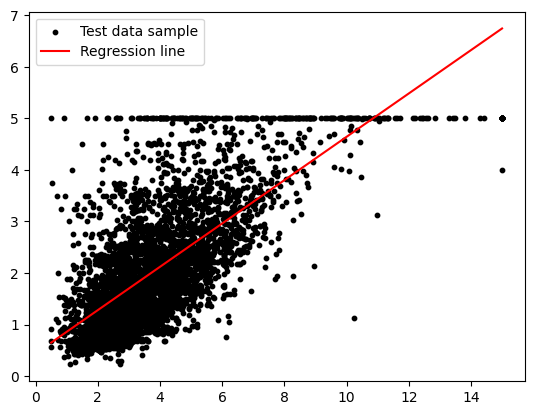

In [28]:
# 산점도(scatter plot), 회귀선(regression line), 각주(legend) 나타내기
plt.scatter(X_test['MedInc'], y_test, s=10, c='black')
plt.plot(line_X, line_y, c='red')
plt.legend(['Test data sample', 'Regression line'], loc='upper left')
plt.show()

---> 너무 분산되어 나온다. 실제값과 예측값 차이 多. MedInc 하나만 가지고 평가하기 부족.

### 1.2 다중 선형 회귀  
전체 columns 사용.

In [29]:
mul_lr = LinearRegression()
mul_lr.fit(X_train, y_train)
y_pred = mul_lr.predict(X_test)
print('다중 선형 회귀, R2: {:.4f}'.format(r2_score(y_test, y_pred)))

다중 선형 회귀, R2: 0.6175


## **2. 결정 트리 모델(Decision Tree Regressor)**

### 2.1. 단순 결정 트리 모델

In [38]:
dt_regr = DecisionTreeRegressor(max_depth=5) # 임의의 depth를 줘 본다.
dt_regr.fit(X_train['MedInc'].values.reshape((-1, 1)), y_train)
y_pred = dt_regr.predict(X_test['MedInc'].values.reshape(-1, 1))
# 모델 평가
print('단순 결정 트리 회귀 R2: {:.4f}'.format(r2_score(y_test, y_pred)))

단순 결정 트리 회귀 R2: 0.4828


max_depth 변화를 줘 본다. 너무 높이면 학습 데이터와 오버피팅되어 테스트용 데이터와 격차가 벌어지게 된다. 따라서 반복문을 써서 가장 좋은 depth를 쓴다. 아래에 만들어 보자

In [39]:
# 배열 만들기
arr = np.arange(1, 11)
print(arr)
# [ 1  2  3  4  5  6  7  8  9 10]

best_depth = 1
best_r2 = 0
for depth in arr:
    dt_regr = DecisionTreeRegressor(max_depth=depth)
    dt_regr.fit(X_train['MedInc'].values.reshape((-1, 1)), y_train)
    y_pred = dt_regr.predict(X_test['MedInc'].values.reshape(-1, 1))

    temp_r2 = r2_score(y_test, y_pred)
    print('\n단순 결정 트리 회귀 depth={} R2: {:.4f}'.format(depth, temp_r2))

    if best_r2 <temp_r2:
        best_depth = depth
        best_r2 = temp_r2

print('\n===> 최적의 결과는 depth={} r2={:.4f}'.format(best_depth, best_r2))

[ 1  2  3  4  5  6  7  8  9 10]

단순 결정 트리 회귀 depth=1 R2: 0.3087

단순 결정 트리 회귀 depth=2 R2: 0.4459

단순 결정 트리 회귀 depth=3 R2: 0.4826

단순 결정 트리 회귀 depth=4 R2: 0.4856

단순 결정 트리 회귀 depth=5 R2: 0.4828

단순 결정 트리 회귀 depth=6 R2: 0.4814

단순 결정 트리 회귀 depth=7 R2: 0.4800

단순 결정 트리 회귀 depth=8 R2: 0.4691

단순 결정 트리 회귀 depth=9 R2: 0.4590

단순 결정 트리 회귀 depth=10 R2: 0.4480

===> 최적의 결과는 depth=4 r2=0.4856


### 2.2 다중 결정 트리 모델

In [41]:
# 배열 만들기
arr = np.arange(1, 11)
print(arr)
# [ 1  2  3  4  5  6  7  8  9 10]

best_depth = 1
best_r2 = 0
for depth in arr:
    dt_regr = DecisionTreeRegressor(max_depth=depth)
    dt_regr.fit(X_train, y_train)
    y_pred = dt_regr.predict(X_test)

    temp_r2 = r2_score(y_test, y_pred)
    print('\n다중 결정 트리 회귀 depth={} R2: {:.4f}'.format(depth, temp_r2))

    if best_r2 <temp_r2:
        best_depth = depth
        best_r2 = temp_r2

print('\n===> 최적의 결과는 depth={} r2={:.4f}'.format(best_depth, best_r2))

[ 1  2  3  4  5  6  7  8  9 10]

다중 결정 트리 회귀 depth=1 R2: 0.3087

다중 결정 트리 회귀 depth=2 R2: 0.4459

다중 결정 트리 회귀 depth=3 R2: 0.5305

다중 결정 트리 회귀 depth=4 R2: 0.5771

다중 결정 트리 회귀 depth=5 R2: 0.6122

다중 결정 트리 회귀 depth=6 R2: 0.6367

다중 결정 트리 회귀 depth=7 R2: 0.6622

다중 결정 트리 회귀 depth=8 R2: 0.6731

다중 결정 트리 회귀 depth=9 R2: 0.6919

다중 결정 트리 회귀 depth=10 R2: 0.6994

===> 최적의 결과는 depth=10 r2=0.6994


In [42]:
dt_regr = DecisionTreeRegressor(max_depth=10)
dt_regr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [43]:
# 모델 평가
y_pred = dt_regr.predict(X_test)
print('다중 결정 트리 R2: {:.4f}'.format(r2_score(y_test, y_pred)))

다중 결정 트리 R2: 0.7005
